# 3 Pre-processing:

## 3.1 Contents: 
* [3.2 Importin libraries](3.2_Importing_libraries)
* [3.3 Loading the dataset](3.3_Loading_the_dataset)
* [3.4 Converting data types](3.4_Converting_data_types)
* [3.5 Creating dummy variables](3.5_Creating_dummy_variables)
* [3.6 Train/Test split](3.6_Train/Test_split)
* [3.7 Scaling the features](3.7_Scaling_the_features)
___

* [4 Modeling](4_Modeling)
    * [4.1 Initial Not-Even-A-Model](4.1_Initial_Not-Even-A-Model)
    * [4.2 Linear models](4.2-Linear-models)
        * [4.2.1 Linear Regression model](4.2.1-Linear-Regression-model)
            * [4.2.1.1 Model implementation](4.2.1.1_Model_implementation)
            * [4.2.1.2 Final evaluation](4.2.1.2_Final_evaluation)
        * [4.2.2 Elastic Net Regression model](4.2.2-Elastic-Net-Regression-model)
            * [4.2.2.1 Model implementation](4.2.2.1_Model_implementation)
            * [4.2.2.2 Final evaluation](4.2.2.2_Final_evaluation)
        * [4.2.3 Polynomial model](4.2.3-Polynomial-model)
            * [4.2.3.1 Model implementation](4.2.3.1_Model_implementation)
            * [4.2.3.2 Final evaluation](4.2.3.2_Final_evaluation)
    * [4.3 Support Vector Regression](4.3_Support_Vector_Regression)
        * [4.3.1 Model implementation](4.2.3.1_Model_implementation)
        * [4.3.2 Final evaluation](4.2.3.2_Final_evaluation)
    * [4.4 Random Forrest Regression](4.4_Random_Forrest_Regression)
        * [4.4.1 Model implementation](4.2.3.1_Model_implementation)
        * [4.4.2 Final evaluation](4.2.3.2_Final_evaluation)
        
___


* move forward with best performing model 
* reveal which features are most important to that model 
* display relative importance with a barchart


## 3.2 Importing libraries:<a id='3.2_Importing_libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
import dill

___

## 3.3 Loading the dataset:<a id='3.3_Loading_the_dataset'></a>

In [2]:
df = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/House-Price-prediction-API/data/df_eda.csv')
df.head()

,SalePrice,Neighborhood,YearBuilt,Fireplaces,Condition,HouseStyle,BuildingType,HalfBath,FullBath,Bedrooms,HouseArea,LotArea,GarageCars,MasVnrArea,Exterior1st,YearRemodAdd
0,208500,CollgCr,2003,0,Good,Two story,Single-family,1,2,3,3114,8450,2,196.0,VinylSd,2003
1,181500,Veenker,1976,1,Above Average,One story,Single-family,0,2,3,2984,9600,2,0.0,MetalSd,1976
2,223500,CollgCr,2001,1,Good,Two story,Single-family,1,2,3,3314,11250,2,162.0,VinylSd,2002
3,140000,Crawfor,1915,1,Good,Two story,Single-family,0,1,3,3115,9550,3,0.0,Wd Sdng,1970
4,250000,NoRidge,2000,1,Very Good,Two story,Single-family,1,2,4,4179,14260,3,350.0,VinylSd,2000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1459 non-null   int64  
 1   Neighborhood  1459 non-null   object 
 2   YearBuilt     1459 non-null   int64  
 3   Fireplaces    1459 non-null   int64  
 4   Condition     1459 non-null   object 
 5   HouseStyle    1459 non-null   object 
 6   BuildingType  1459 non-null   object 
 7   HalfBath      1459 non-null   int64  
 8   FullBath      1459 non-null   int64  
 9   Bedrooms      1459 non-null   int64  
 10  HouseArea     1459 non-null   int64  
 11  LotArea       1459 non-null   int64  
 12  GarageCars    1459 non-null   int64  
 13  MasVnrArea    1459 non-null   float64
 14  Exterior1st   1459 non-null   object 
 15  YearRemodAdd  1459 non-null   int64  
dtypes: float64(1), int64(10), object(5)
memory usage: 182.5+ KB


___

## 3.4 Converting data types:<a id='3.4_Converting_data_types'></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1459 non-null   int64  
 1   Neighborhood  1459 non-null   object 
 2   YearBuilt     1459 non-null   int64  
 3   Fireplaces    1459 non-null   int64  
 4   Condition     1459 non-null   object 
 5   HouseStyle    1459 non-null   object 
 6   BuildingType  1459 non-null   object 
 7   HalfBath      1459 non-null   int64  
 8   FullBath      1459 non-null   int64  
 9   Bedrooms      1459 non-null   int64  
 10  HouseArea     1459 non-null   int64  
 11  LotArea       1459 non-null   int64  
 12  GarageCars    1459 non-null   int64  
 13  MasVnrArea    1459 non-null   float64
 14  Exterior1st   1459 non-null   object 
 15  YearRemodAdd  1459 non-null   int64  
dtypes: float64(1), int64(10), object(5)
memory usage: 182.5+ KB


___

## 3.5 Creating dummy variables: <a id='3.5_Creating_dummy_variables'></a>

In [5]:
df_object = df.select_dtypes(include = 'object')
df_numeric = df.select_dtypes(exclude = 'object')

In [6]:
df_object_dummies = pd.get_dummies(df_object,drop_first=True)

In [7]:
df_object_dummies.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
final_df = pd.concat([df_numeric,df_object_dummies], axis = 1)

In [9]:
final_df.head()

,SalePrice,YearBuilt,Fireplaces,HalfBath,FullBath,Bedrooms,HouseArea,LotArea,GarageCars,MasVnrArea,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,208500,2003,0,1,2,3,3114,8450,2,196.0,...,0,0,0,0,0,0,0,1,0,0
1,181500,1976,1,0,2,3,2984,9600,2,0.0,...,0,0,0,1,0,0,0,0,0,0
2,223500,2001,1,1,2,3,3314,11250,2,162.0,...,0,0,0,0,0,0,0,1,0,0
3,140000,1915,1,0,1,3,3115,9550,3,0.0,...,0,0,0,0,0,0,0,0,1,0
4,250000,2000,1,1,2,4,4179,14260,3,350.0,...,0,0,0,0,0,0,0,1,0,0


___

## 3.6 Train/Test split:<a id='3.6_Train/Test_split'></a>

In [10]:
X = final_df.drop(columns = 'SalePrice', axis = 1)
y = final_df['SalePrice']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
X_train['Neighborhood_NWAmes'].value_counts()

0    1111
1      56
Name: Neighborhood_NWAmes, dtype: int64

In [13]:
d = pd.DataFrame(columns =['YearBuilt', 'Fireplaces', 'HalfBath', 'FullBath', 'Bedrooms',
       'HouseArea', 'LotArea', 'GarageCars', 'MasVnrArea', 'YearRemodAdd',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition_Average', 'Condition_Below Average', 'Condition_Excellent',
       'Condition_Fair', 'Condition_Good', 'Condition_Poor',
       'Condition_Very Excellent', 'Condition_Very Good',
       'Condition_very poor', 'HouseStyle_One story', 'HouseStyle_Split Foyer',
       'HouseStyle_Split Level', 'HouseStyle_Two and a half story',
       'HouseStyle_Two story', 'BuildingType_Single-family',
       'BuildingType_Townhouse', 'BuildingType_Two-family',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'] )

In [14]:
d.loc[0,'Fireplaces'] = 9

In [15]:
d['Fireplaces'] 

0    9
Name: Fireplaces, dtype: object

___

## 3.7 Scaling the features:<a id='3.7_Scaling_the_features'></a>

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_scaled = scaler.transform(X_train)

In [19]:
X_train_scaled.shape

(1167, 65)

In [20]:
X_test_scaled = scaler.transform(X_test)

In [21]:
X_test_scaled.shape

(292, 65)

___
___


# 4 Modeling:

## 4.1 Initial Not-Even-A-Model:
A good place to start is to see how good the mean is as a predictor. In other words, what if you simply say your best guess is the average price?

In [22]:
train_mean = y_train.mean()
train_mean

179014.4944301628

In [23]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train_scaled, y_train)
dumb_reg.constant_

array([[179014.49443016]])

In [24]:
y_tr_pred = pd.DataFrame(dumb_reg.predict(X_train_scaled))
y_tr_pred[:5]

,0
0,179014.49443
1,179014.49443
2,179014.49443
3,179014.49443
4,179014.49443


In [25]:
y_train[:5]

1026    293077
548     263000
1441    310000
330     139000
193     130000
Name: SalePrice, dtype: int64

**Mean Absolute Error:**</br>
Estimating the mean gives us a MAE of 57266. Which means that if we guess the mean, on average we will be off by 57266 dollars.  


In [26]:
mean_absolute_error(y_tr_pred,y_train)

57166.13028815123

**Roat Mean Squared Error:**</br>
The RMSE for estimating the mean is almost 80000 dollars. the reason for the discrepency between the MAE and the RMSE is the fact that we square values when we calculate the RMSE, which makes it more sensitive to outliers. This indicates that our data contain outliers.

In [27]:
np.sqrt(mean_squared_error(y_tr_pred,y_train))

79533.65256263215

**$R^2$:**</br>
A model that predicts the mean will always have an $R^2$ of 0. A model that perfectly predicts the variation in the data will have an $R^2$ of 1.


In [28]:
r2_score(y_train,y_tr_pred)

0.0

___

## 4.2 Linear models:

### 4.2.1 Linear Regression model:

#### 4.2.1.1 Model implementation:


Instantiating a Linear Regression model:

In [29]:
linear_regression_model = LinearRegression()

Fitting our model to the scaled predictive features and our training target feature:

In [30]:
linear_regression_model.fit(X_train_scaled, y_train)

LinearRegression()

The model coefficients give us an idea of how important each predictive feature is. The higher the absolute value of the feature's coefficient the more important it is in the model.

In [31]:
linear_regression_model.coef_

array([ 9.86561848e+03,  5.14063111e+03,  2.15846963e+03,  2.14057717e+03,
       -3.22742064e+03,  3.17201235e+04,  4.37312124e+03, -6.06489136e+02,
        2.69129263e+03,  7.56576489e+03, -3.85200405e+02, -1.47463519e+03,
       -2.28799640e+03, -1.00500109e+03, -4.05396892e+03,  2.02904314e+03,
       -6.00886998e+03, -4.50957416e+03, -4.34888233e+03, -1.69458066e+03,
       -3.86860061e+03, -7.36527386e+03,  3.65089351e+02, -4.41178575e+03,
        5.97045447e+03,  4.02359229e+03, -7.02440186e+03, -1.31944159e+03,
       -4.47551127e+03, -1.81102296e+03, -6.74496315e+02,  4.87789045e+03,
       -1.38434455e+03,  8.53042848e+02, -1.01466599e+03, -1.15976122e+03,
        1.57218984e+04, -1.42719947e+03,  3.81297693e+03, -1.27864950e+03,
        1.23300005e+04,  9.06342644e+03, -4.50685087e+16, -1.07855190e+03,
        1.75787628e+03,  1.76436764e+03, -5.29787612e+02,  2.93897997e+03,
        6.80149235e+03, -3.61060918e+03,  2.21662052e+03,  6.93259607e+02,
       -1.27519618e+03,  

# error values way off 

#### 4.2.1.2 Cross validation scores:

cross_val_score performs a cross validation with a single scoring mertic. The following one is for the negative MAE:

In [32]:
scores_lr = cross_val_score(linear_regression_model,X_train_scaled,y_train,
                         scoring='neg_mean_absolute_error',cv=5)

In [33]:
scores_lr

array([-2.15839485e+09, -1.98192195e+04, -1.84272685e+04, -1.97816692e+04,
       -1.81653641e+11])

The average MAE for a 5 fold cross validation is 10,042,198,482 dollars. This is a huge red flag. We will look into the RMSE next to see if this trend continues.

In [34]:
abs(scores_lr.mean())

36762418777.92396

Here we will perform another cross_val_score for the negative MSE:

In [35]:
scores_lr_2 = cross_val_score(linear_regression_model,X_train_scaled,y_train,
                         scoring='neg_mean_squared_error',cv=5)

In [36]:
scores_lr_2

array([-1.09010894e+21, -1.45948118e+09, -7.72531119e+08, -8.82560284e+08,
       -7.68854303e+24])

To find the average RMSE of the 5 fold cross validation, we take the absolute value of each error, then the square root of each error, and finally we average the values:</br>

In [37]:
np.sqrt(abs(scores_lr_2)).mean()

561167821522.8547

Performing a cross_val_score for $R^2$:

In [38]:
scores_lr_3 = cross_val_score(linear_regression_model,X_train_scaled,y_train,
                         scoring='r2',cv=5)

In [39]:
scores_lr_3.mean()

-299477301149966.6

**The high error metrics for the Linear Regression model could be because of a few reasons:** 
* Linearity: The relationship between the independent variables and the dependent variable is not linear.
* Multicollinearity: The independent variables are highly correlated with each other.
* The presence of outliers.</br>

we will continue with an Elastic Net model which might produce better results. 

#### 4.2.1.3 Final evaluation:

**We will skip evaluating on the test set for the Linear Regression model because it performed poorly.**

___

### 4.2.2 Elastic Net Regression model:

We will use an Elastic Net model since we will be able to test both Ridge and LASSO regularizations:

#### 4.2.2.1 Model implementation

In [40]:
base_elastic_model = ElasticNet()

The Elastic Net model has two main parameters, alpha, and the L1 ratio. We will test different combinations to see which produces the most effective model:

In [41]:
param_grid_en = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [42]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid_en,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [43]:
grid_model.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 0.99}

#### 4.2.2.2 Cross Validation scores:

In [45]:
scores_en = cross_val_score(grid_model,X_train_scaled,y_train,
                         scoring='neg_mean_absolute_error',cv=5)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [46]:
abs(scores_en.mean())

18944.766764611042

In [47]:
scores_en_2 = cross_val_score(grid_model,X_train_scaled,y_train,
                         scoring='neg_mean_squared_error',cv=5)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [48]:
np.sqrt(abs(scores_en_2)).mean()

30284.306791169387

In [49]:
scores_en_3 = cross_val_score(grid_model,X_train_scaled,y_train,
                         scoring='r2',cv=5)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [50]:
scores_en_3.mean()

0.8510688387958755

The Elastic Net model performs much better than the Linear Regression model. This 

#### 4.2.2.2 Final evaluation:

In [51]:
y_pred_en = grid_model.predict(X_test_scaled)

In [52]:
r2_score(y_test,y_pred_en)

0.6991756874204993

In [53]:
mean_absolute_error(y_test,y_pred_en)

21162.011306457334

In [54]:
np.sqrt(mean_squared_error(y_test,y_pred_en))

42701.10407981615

The Elastic Net model performs much better than the Linear Regression model. If we look at the best parameters from the grid search, we see that they are an alpha of 5, and an l1_ratio of 0.99, which means that the Elastic Net model is mostly a LASSO regression model. This could mean that the higher performance is due to the LASSO effect of shrinking some of the features' coeficients to zero.

___

### 4.2.3 Polynomial model:


Here we will try a Polynomial model. We will create the polynomial features and go through the necessary preprocessing procedure again:

#### 4.2.3.1 Creating polynomial features:

In [55]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [56]:
poly_features = polynomial_converter.fit_transform(X)

In [57]:
poly_features.shape

(1459, 50115)

In [58]:
X.shape

(1459, 65)

In [59]:
X.iloc[0]

YearBuilt              2003.0
Fireplaces                0.0
HalfBath                  1.0
FullBath                  2.0
Bedrooms                  3.0
                        ...  
Exterior1st_Stone         0.0
Exterior1st_Stucco        0.0
Exterior1st_VinylSd       1.0
Exterior1st_Wd Sdng       0.0
Exterior1st_WdShing       0.0
Name: 0, Length: 65, dtype: float64

In [60]:
poly_features[0]

array([2.003e+03, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
       0.000e+00])

#### 4.2.3.2 Train/Test split for the polynomial features:

In [61]:
X_Ptrain, X_Ptest, y_Ptrain, y_Ptest = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [62]:
scaler_poly = StandardScaler()

In [63]:
X_Ptrain_scaled = scaler_poly.fit_transform(X_Ptrain)

In [64]:
X_Ptest_scaled = scaler_poly.transform(X_Ptest)

#### 4.2.3.3 Fitting the model:

In [65]:
poly_model = LinearRegression(fit_intercept=True)

In [66]:
poly_model.fit(X_Ptrain_scaled,y_Ptrain)

LinearRegression()

#### 4.2.3.4 Cross Validation scores:

In [67]:
scores_p = cross_val_score(poly_model,X_Ptrain_scaled,y_Ptrain,
                         scoring='neg_mean_absolute_error',cv=5)

In [68]:
abs(scores_p.mean())

9723605843.19851

In [69]:
scores_p_2 = cross_val_score(poly_model,X_Ptrain_scaled,y_Ptrain,
                         scoring='neg_mean_squared_error',cv=5)

In [70]:
np.sqrt(abs(scores_p_2)).mean()

22301766878.079178

In [71]:
scores_p_3 = cross_val_score(poly_model,X_Ptrain_scaled,y_Ptrain,
                         scoring='r2',cv=5)

In [72]:
scores_p_3.mean()

-177933789704.3999

#### 4.2.3.4 Final evaluation:

In [73]:
poly_test_predictions = poly_model.predict(X_Ptest_scaled)

In [74]:
MAE_p = mean_absolute_error(y_Ptest,poly_test_predictions)
MSE_p = mean_squared_error(y_Ptest,poly_test_predictions)
RMSE_p = np.sqrt(MSE_p)

In [75]:
MAE_p

1861209482.5709674

In [76]:
RMSE_p

4638476183.77102

The Polynomial model performs better than the Linear Regression model but the same issues that plague the Linear Regression model have an effect here. It seems that the Elastic Net model is the best performing linear model. Now we will try a different type of  refression models.

___

## 4.3 Support Vector Regression: 

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) algorithm, which is a supervised learning algorithm that can be used for regression problems. SVR is a linear model that aims to find the hyperplane that maximally separates the data points into two classes, while at the same time minimizing the classification error. In SVR, the goal is to find the hyperplane that maximally separates the data points from the prediction error, while at the same time minimizing the margin of deviation between the predicted value and the true value of the dependent variable.

### 4.3.1 Model implementation 

In [77]:
svr = SVR()
param_grid_svr = {'C':[25,30,100,200,300,400,1000,5000,10000],
             'kernel':['rbf','linear'],
              'gamma':['scale','auto'],
              'epsilon':[10,20,30,50,100,300,1000,5000,10000]}

In [78]:
grid_svr = GridSearchCV(svr,param_grid=param_grid_svr)

In [79]:
grid_svr.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [25, 30, 100, 200, 300, 400, 1000, 5000, 10000],
                         'epsilon': [10, 20, 30, 50, 100, 300, 1000, 5000,
                                     10000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']})

In [80]:
grid_svr.best_params_

{'C': 10000, 'epsilon': 10000, 'gamma': 'scale', 'kernel': 'linear'}

### 4.3.2 Cross Validation scores:

In [81]:
scores_svr = cross_val_score(grid_svr,X_train_scaled,y_train,
                         scoring='neg_mean_absolute_error',cv=5)

In [82]:
abs(scores_svr.mean())

18358.336931397964

In [83]:
scores_svr_2 = cross_val_score(grid_svr,X_train_scaled,y_train,
                         scoring='neg_mean_squared_error',cv=5)

In [84]:
np.sqrt(abs(scores_svr_2)).mean()

29607.016181049752

In [85]:
scores_svr_3 = cross_val_score(grid_svr,X_train_scaled,y_train,
                         scoring='r2',cv=5)

In [86]:
scores_svr_3.mean()

0.858511057663882

### 4.3.2 Final model evaluation

In [87]:
grid_preds_svr = grid_svr.predict(X_test_scaled)

In [88]:
mean_absolute_error(y_test,grid_preds_svr)

20701.718266949727

In [89]:
np.sqrt(mean_squared_error(y_test,grid_preds_svr))

43642.87328967998

In [90]:
r2_score(y_test,grid_preds_svr)

0.6857600515472577

___

## 4.4 Random Forrest 

### 4.4.1 Model implementation: 

In [91]:
param_grid_rf = {'n_estimators': [10,12,16,20,26,33,42,54,69,88,112,143,183,233,297,379,483,615,784,1000]}
param_grid_rf

{'n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000]}

In [92]:
rf = RandomForestRegressor(random_state=42)

In [93]:
grid_rf = GridSearchCV(rf, param_grid=param_grid_rf,cv=5)

In [94]:
grid_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69,
                                          88, 112, 143, 183, 233, 297, 379, 483,
                                          615, 784, 1000]})

In [95]:
grid_rf.best_params_

{'n_estimators': 183}

### 4.4.2 Cross Validation scores:

In [96]:
scores_rf = cross_val_score(grid_rf,X_train_scaled,y_train,
                         scoring='neg_mean_absolute_error',cv=5)

In [97]:
abs(scores_rf.mean())

18942.386783858063

In [98]:
scores_rf_2 = cross_val_score(grid_rf,X_train_scaled,y_train,
                         scoring='neg_mean_squared_error',cv=5)

In [99]:
np.sqrt(abs(scores_rf_2)).mean()

31432.378198577022

In [100]:
scores_rf_3 = cross_val_score(grid_rf,X_train_scaled,y_train,
                         scoring='r2',cv=5)

In [101]:
scores_rf_3.mean()

0.8395943353905448

### 4.4.2 Final model evaluation:

In [102]:
grid_preds_rf = grid_rf.predict(X_test_scaled)

In [103]:
mean_absolute_error(y_test,grid_preds_rf)

20543.446727549464

In [104]:
np.sqrt(mean_squared_error(y_test,grid_preds_rf))

35225.83114415899

In [105]:
r2_score(y_test,grid_preds_rf)

0.7952814379874916

___

## 4.5 Conclusions:

### 4.5.1 Model comparison: 
We will compare metrics across our models to decide on which one to move forward with. We will only consider the Elastic Net model from the linear models.


Model | $R^2$ | MAE | RMSE |
------|-------|-----|------|
Elastic Net | 0.699 | 20971 | 42735 |
Support Vector Regression | 0.686 | 20621 |43630|
Random Forrest | 0.808 | 20757 | 34105 |


We can see that the Elastic Net and the Support Vector Regression models perform similarly. But, the best performer is the Random Forrest model, it outperforms the other two on all three metrics. We will move forward with the Random Forrest model.

### 4.5.2 Random Forrest model exploration:
Now that we decided to move forward with the Random Forrest model, we will explore a bit further. 

#### 4.5.2.1 What are the most important features to our model?
Let's display the most important features to our model and see if anything looks interesting:

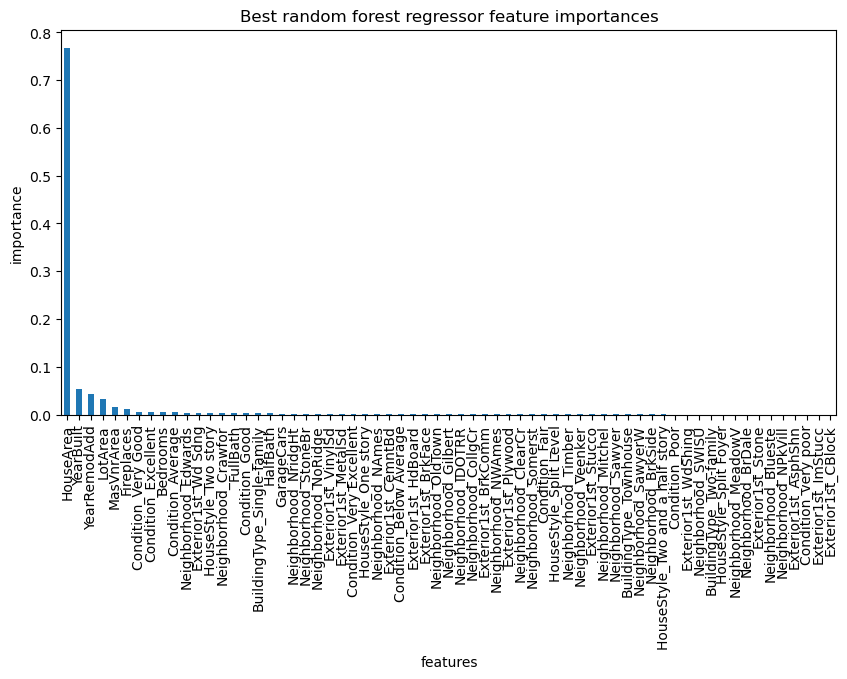

In [106]:
plt.subplots(figsize=(10, 5))
imps = grid_rf.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

It seems like the HousArea is important for our model as it accounts for almost 80% of importance. The second most important feature in our model is the YearBuilt of the house, and it only accounts for about 5% of importance.

## 4.6 Saving our model:

In [107]:
model = grid_rf.best_estimator_

In [108]:
with open('../models/rf.pkl','wb') as f:
    dill.dump(model,f)
    

We'll also save the model into the app folder since we're going to need it there.

In [109]:
with open('../app/rf.pkl','wb') as f:
    dill.dump(model,f)

In [110]:
with open('../app/scaler.pkl','wb') as f:
    dill.dump(scaler,f)

Let's make sure our model was saved correctly. We will reload it and make predictions to make sure everything is working properly:

In [111]:
with open('../models/rf.pkl','rb') as f:
    reloaded_model = dill.load(f)

In [112]:
reloaded_model

RandomForestRegressor(n_estimators=183, random_state=42)

It looks like our model was saved correctly. Let's make a few predictions for good measure:

In [113]:
y_p = reloaded_model.predict(X_test_scaled)

In [114]:
mean_absolute_error(y_test,y_p)

20543.446727549464

In [115]:
np.sqrt(mean_squared_error(y_test,y_p))

35225.83114415899

In [116]:
r2_score(y_test,y_p)

0.7952814379874916

___